In [4]:
!pip install investpy

  Using cached investpy-1.0.tar.gz (4.4 MB)
  Using cached Unidecode-1.1.1-py2.py3-none-any.whl (238 kB)
  Created wheel for investpy: filename=investpy-1.0-py3-none-any.whl size=4465845 sha256=00c8f6f0a4f0b6cf15a1d8bab4d4c1d9594ea1c0584df35159e98b964b4d15b1
  Stored in directory: c:\users\diego\appdata\local\pip\cache\wheels\6a\1d\35\76f15450b4c9c3f5ba40a5b037281874978b2093da7d482e9b
Successfully built investpy


In [5]:
!pip install mpl_finance

  Using cached mpl_finance-0.10.1-py3-none-any.whl (8.4 kB)


            Abertura  Maximo  Minimo  Fechamento    Volume Moeda      Data  \
Data                                                                         
2020-01-02     36.05   36.78   35.77       36.78  20666100   BRL  737426.0   
2020-01-03     36.26   36.98   36.22       36.39  24891400   BRL  737427.0   
2020-01-06     36.31   36.34   35.69       35.85  22294700   BRL  737430.0   
2020-01-07     35.85   36.01   35.02       35.02  20000900   BRL  737431.0   
2020-01-08     35.25   35.60   34.45       34.45  25980900   BRL  737432.0   
...              ...     ...     ...         ...       ...   ...       ...   
2020-09-18     23.60   23.60   23.03       23.10  38507500   BRL  737686.0   
2020-09-21     22.70   23.01   22.45       22.90  36482700   BRL  737689.0   
2020-09-22     22.85   23.30   22.79       23.10  26051000   BRL  737690.0   
2020-09-23     22.92   23.13   22.47       22.48  24442900   BRL  737691.0   
2020-09-24     22.51   23.33   22.42       23.03  39307800   BRL

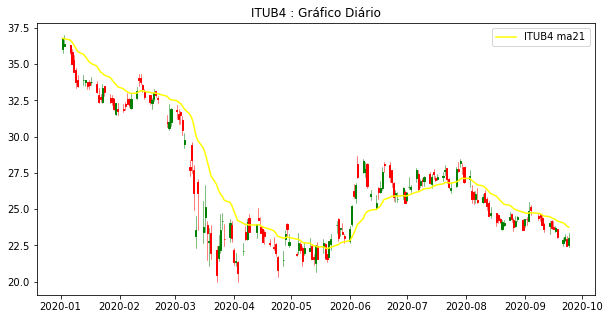

In [8]:
#Stock_Trend_Identificator_Python
#title of tutorial: COMO IDENTIFICAR AÇÕES EM TENDÊNCIA DE ALTA AUTOMATICAMENTE | Análise Técnica e Python #3
#link of tutorial: https://www.youtube.com/watch?v=i6x8GaabMa0
#link of iHack page: https://ihack.com.br/at_003.php


import investpy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc

acao2 = 'ITUB4'

df_bolsa = investpy.get_stock_historical_data(stock=acao2,
                                          country='brazil',
                                          from_date='01/01/2020',
                                          to_date='24/09/2020')

df_bolsa.index.names = ['Data']
df_bolsa.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume', 'Moeda']

df_ = df_bolsa.copy(deep=True)

df_['Data'] = df_.index.map(mdates.date2num)

# compute the simple moving average
df_['ema21'] = df_['Fechamento'].ewm(span=21, adjust=False).mean()

print(df_)

tendencia_alta=1
for i in range(6):
  if(df_.ema21[-i-1] < df_.ema21[-i-2]):
    tendencia_alta=0

print()
if(tendencia_alta==1):
    print(acao2 + ' está em tendência de alta!')
else:
    print(acao2 + ' não está em tendência de alta!')

##############
# Plot Chart #
##############


ohlc = df_[['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento']]


f1, ax = plt.subplots(figsize=(10, 5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# plot the moving average lines
label_ = acao2.upper() + ' ma21'
ax.plot(df_.index, df_['ema21'], color='yellow', label=label_)
# ax.plot(df.index, df['ema100'], color = 'purple', label = 'ma100')

# other parameters
ax.grid(False)
ax.legend()

plt.title(acao2.upper() + ' : Gráfico Diário')

plt.show(block=True)

del (df_)